<h2 align=center> AMES House Prices using EDA and Feature Engineering</h2>

---

### 1. Importing Libraries and Loading Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ames.csv')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


### 2. Getting Familiar With Data.

In [3]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

In [4]:
data.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSold,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 3. Checking Data from Missing and Categorical Values.

In [5]:
data.isnull().sum().sort_values(ascending = False)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 79, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [7]:
cat_cols = data.select_dtypes('object').columns.to_list()
for i in cat_cols:
    data[i], _ = data[i].factorize()
    
X = data.drop('SalePrice', axis = 1)
y = data.SalePrice

disc = X.dtypes == int

### 4. Starting with EDA and Feature Engineering.

In [8]:
from sklearn.feature_selection import mutual_info_regression

info = mutual_info_regression(X ,y ,discrete_features = disc )

info_series = pd.Series(info,index = X.columns)
info_series = info_series.sort_values(ascending = False)

In [9]:
info_series

OverallQual         0.592307
Neighborhood        0.550622
GrLivArea           0.496582
GarageArea          0.414775
YearBuilt           0.401348
                      ...   
Heating             0.000000
Utilities           0.000000
Threeseasonporch    0.000000
Condition2          0.000000
PoolArea            0.000000
Length: 78, dtype: float64

<AxesSubplot:>

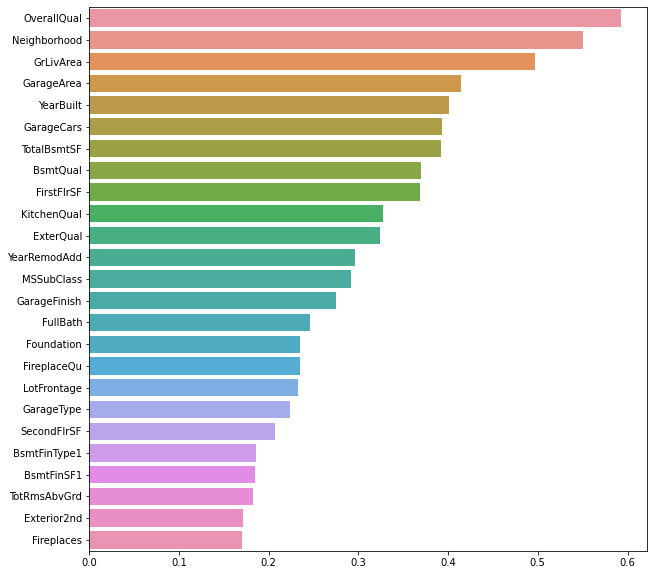

In [10]:
info_series = info_series.sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(x = info_series[0:25], y = info_series.index[0:25])

<AxesSubplot:>

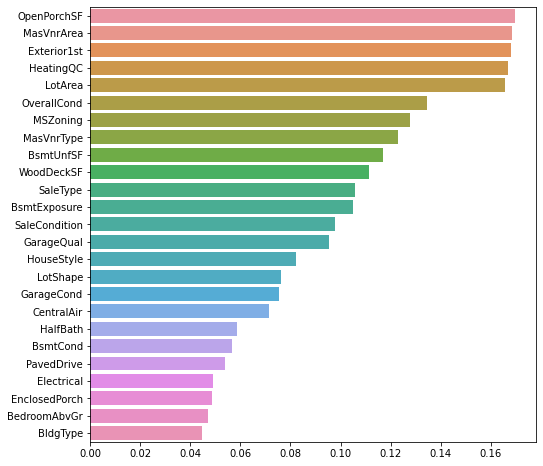

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(x = info_series[25:50], y = info_series.index[25:50])

<AxesSubplot:>

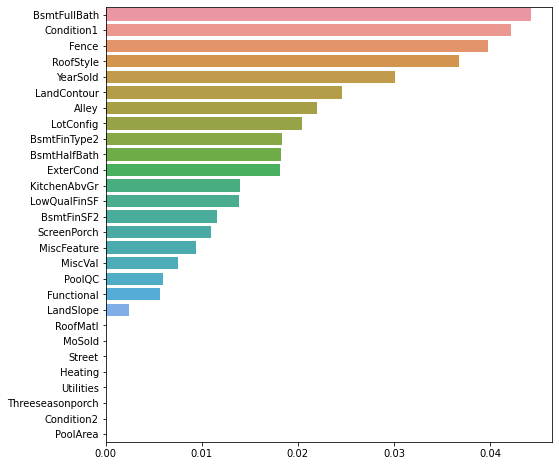

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(x = info_series[50:78], y = info_series.index[50:78])

<AxesSubplot:>

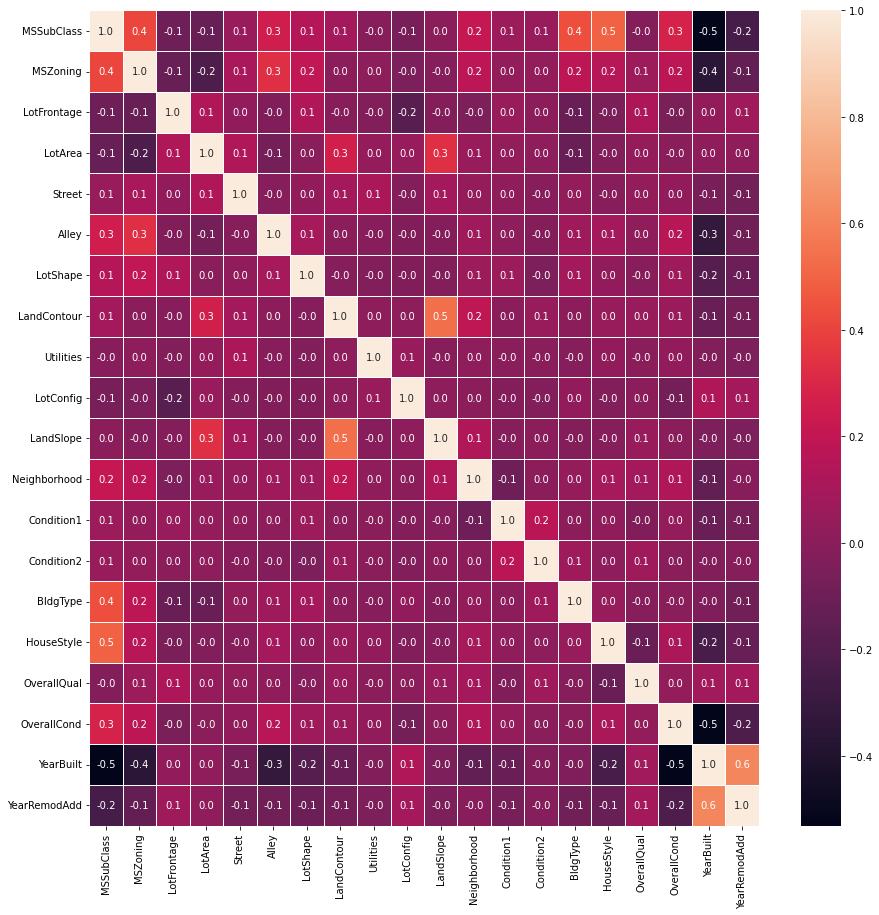

In [13]:
sliced_data = data.iloc[:, 0:20]
plt.figure(figsize=(15,15))
sns.heatmap(sliced_data.corr(), annot= True, linewidth = .5, fmt= '.1f')

<AxesSubplot:>

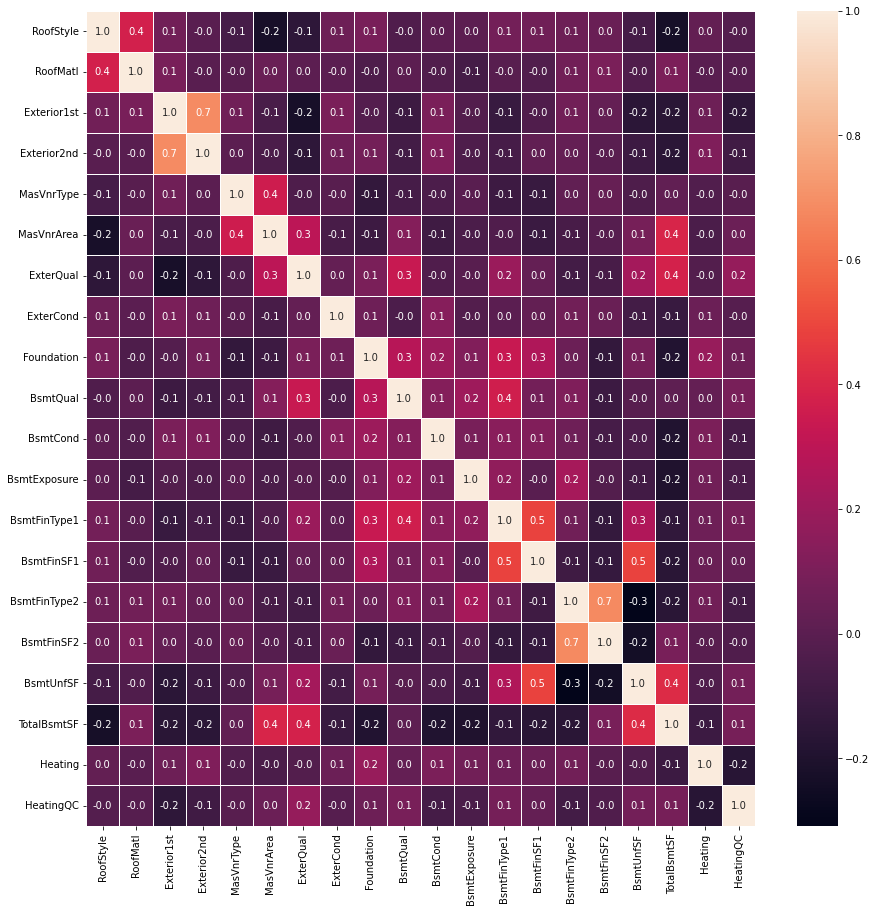

In [14]:
sliced_data = data.iloc[:, 20:40]
plt.figure(figsize=(15,15))
sns.heatmap(sliced_data.corr(), annot= True, linewidth = .5, fmt= '.1f')

<AxesSubplot:>

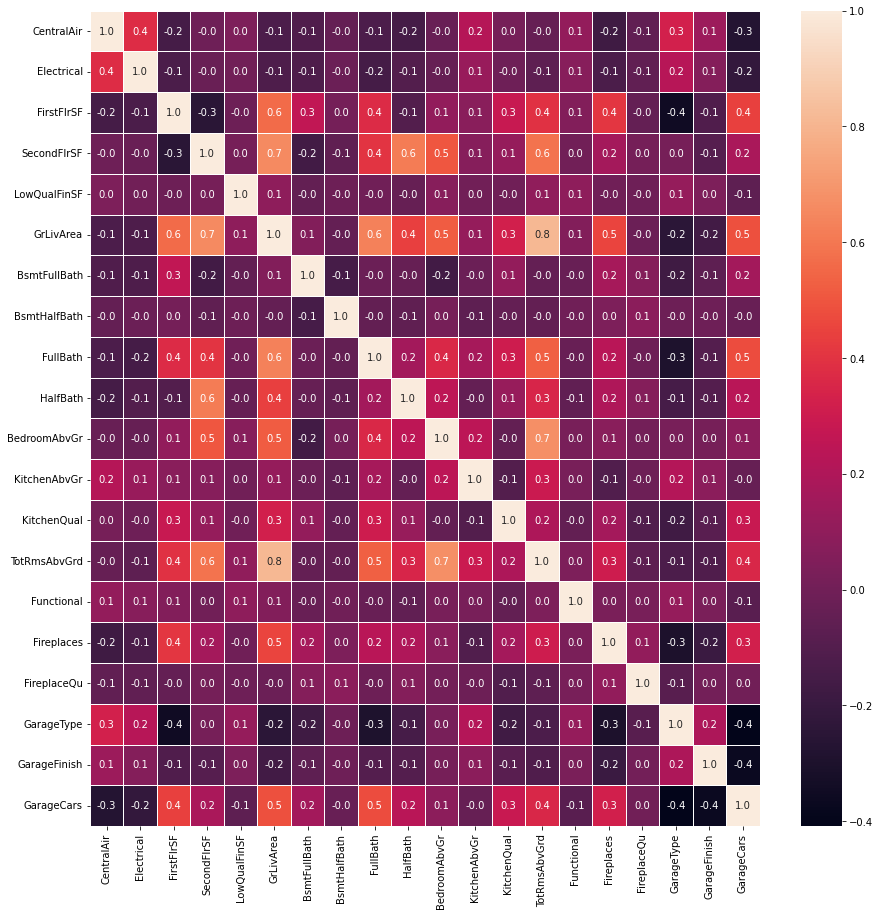

In [15]:
sliced_data = data.iloc[:, 40:60]
plt.figure(figsize=(15,15))
sns.heatmap(sliced_data.corr(), annot= True, linewidth = .5, fmt= '.1f')

<AxesSubplot:>

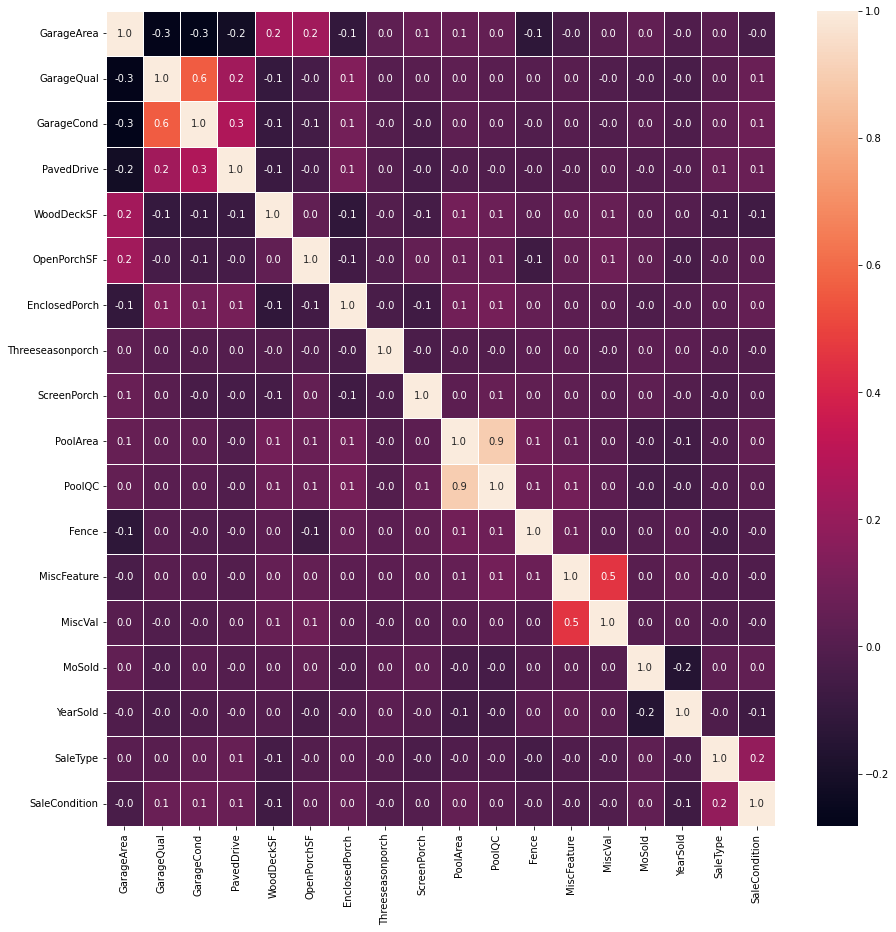

In [16]:
sliced_data = data.iloc[:, 60:78]
plt.figure(figsize=(15,15))
sns.heatmap(sliced_data.corr(), annot= True, linewidth = .5, fmt= '.1f')

### 5. Selecting Features and Splitting the Data.

In [17]:
remove = ['MoSold', 'Utilities', 'PoolQC','PoolArea' ,'MiscVal' , 'LandSlope','Threeseasonporch','TotRmsAbvGrd' ]

X = X.drop(remove, axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 200)

### 6. Evaluate and Test our Data.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

model = RandomForestRegressor(n_estimators=200)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

86.94998521142398 %


# We got 86.9% accuracy which is a pretty good result!